In [162]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### Import transit demand and transit supply shapefile

In [163]:
#Import demand shapefile
demand = gpd.read_file("/Users/elizalawrence/Documents/GEOG490_gds/FinalProject/transit_demand.shp")
demand

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,percent_em,percent_ci,percent_en,percent_ol,percent_yo,percent_di,percent_tr,transit_de,quartile,geometry
0,17,031,221000,17031221000,2210,Census Tract 2210,G5020,S,220053,0,...,1.094588,0.204266,0.300543,-1.181467,-1.004777,-0.288440,0.415490,-0.478556,Moderate-Low,"POLYGON ((-87.71699 41.92460, -87.71675 41.924..."
1,17,031,221100,17031221100,2211,Census Tract 2211,G5020,S,440042,0,...,0.696175,-0.017812,0.335960,-0.262271,-1.211029,-0.523213,1.234743,1.255102,Moderate-High,"POLYGON ((-87.71374 41.92464, -87.71366 41.924..."
2,17,031,242800,17031242800,2428,Census Tract 2428,G5020,S,439630,0,...,1.360644,-0.623332,0.258304,0.042293,-1.220993,-0.588957,0.144666,-2.904721,Low,"POLYGON ((-87.69670 41.89565, -87.69646 41.895..."
3,17,031,242900,17031242900,2429,Census Tract 2429,G5020,S,323819,0,...,1.614693,0.498243,-0.016333,-1.420200,-0.948180,-0.433222,-0.071813,-3.578827,Low,"POLYGON ((-87.68684 41.89574, -87.68635 41.895..."
4,17,031,243000,17031243000,2430,Census Tract 2430,G5020,S,324547,0,...,1.352080,-0.628736,-0.612863,-0.674741,-1.749749,-0.905586,0.494809,-4.556103,Low,"POLYGON ((-87.68195 41.89583, -87.68146 41.895..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,17,031,050300,17031050300,503,Census Tract 503,G5020,S,380031,14700,...,1.802761,-0.750137,-0.585593,-0.754534,-0.352493,-0.638437,-0.256682,-3.761897,Low,"POLYGON ((-87.69476 41.96127, -87.69460 41.961..."
1324,17,031,830700,17031830700,8307,Census Tract 8307,G5020,S,861986,7945,...,0.612032,0.044913,0.091573,-0.679818,-0.796316,0.360494,1.816835,2.855798,High,"POLYGON ((-87.66595 41.96164, -87.66575 41.961..."
1325,17,031,834700,17031834700,8347,Census Tract 8347,G5020,S,657991,0,...,-2.124939,-0.286878,-0.847043,1.360335,-0.287943,3.852616,0.998655,3.470745,High,"POLYGON ((-87.65002 41.79424, -87.64986 41.794..."
1326,17,031,824123,17031824123,8241.23,Census Tract 8241.23,G5020,S,3917329,25455,...,0.695201,-1.021687,-0.699522,-0.060430,-0.131794,-0.666649,-1.023503,-2.022907,Moderate-Low,"POLYGON ((-87.81369 41.60198, -87.81287 41.601..."


In [164]:
#Import supply shapefile
supply = gpd.read_file("/Users/elizalawrence/Documents/GEOG490_gds/FinalProject/Transportation-Access-/shapefiles/chicago_transit_supply.shp")
supply

,TRACTCE,ALAND,AWATER,area,area_cover,service_co,bus_stops,density_bs,routesum,wheelchair,transit_su,quartile,geometry
0,221000,220053,0,2.198917e+05,2.198917e+05,0.538065,3.0,-0.570574,-0.676593,-1.121122,-1.830223,Low,"POLYGON ((440550.049 4641653.581, 440570.365 4..."
1,221100,440042,0,4.397288e+05,4.397288e+05,0.538065,13.0,0.607097,-0.335144,0.055983,0.866000,Moderate-High,"POLYGON ((440820.061 4641655.880, 440826.943 4..."
2,242800,439630,0,4.393132e+05,4.393132e+05,0.538065,13.0,0.609166,-0.011365,0.055983,1.191848,Moderate-High,"POLYGON ((442206.390 4638425.562, 442226.962 4..."
3,242900,323819,0,3.235872e+05,3.235872e+05,0.538065,9.0,0.477613,-0.144689,-0.414859,0.456130,Moderate-High,"POLYGON ((443024.390 4638428.848, 443065.044 4..."
4,243000,324547,0,3.243118e+05,3.243118e+05,0.538065,12.0,1.157279,-0.540348,-0.061728,1.093268,Moderate-High,"POLYGON ((443430.438 4638434.936, 443471.091 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,440201,531454,0,5.310625e+05,5.303250e+05,0.531499,12.0,0.091703,-0.439181,-0.061728,0.122292,Moderate-High,"POLYGON ((448872.553 4622326.008, 448885.773 4..."
877,540101,3357305,508399,3.862848e+06,1.173475e+06,-2.753697,13.0,-1.330830,0.133881,0.055983,-3.894664,Low,"POLYGON ((448264.432 4611157.472, 448272.330 4..."
878,050300,380031,14700,3.944459e+05,3.942156e+05,0.535305,6.0,-0.454577,-0.305411,-0.767990,-0.992674,Moderate-Low,"POLYGON ((442426.603 4645709.824, 442440.277 4..."
879,830700,861986,7945,8.692976e+05,8.576700e+05,0.474823,29.0,0.887937,0.449529,1.821639,3.633928,High,"POLYGON ((444814.024 4645731.063, 444830.929 4..."


### Calculate transit desert scores 

In [ ]:
# Group the transit dependency scores into quartiles
demand['quartile_bins'] = pd.qcut(demand['transit_de'], 4, labels=['1', '2', '3', '4'])

In [ ]:
# Group the transit supply scores into quartiles
supply['quartile_bins'] = pd.qcut(supply['transit_su'], 4, labels=['1', '2', '3', '4'])

In [ ]:
# Merge the supply and demand gdfs on census tract id
gdf = pd.merge(supply, demand, left_on=['TRACTCE'], right_on=['TRACTCE'], how='inner')

In [168]:
# Rename geometry column
gdf = gdf.rename(columns={'geometry_x': 'geometry'})

In [ ]:
# Map the categorical data to numerical values and convert to float
print("---- Before ----")
print(gdf['quartile_bins_y'].dtype)
print(gdf['quartile_bins_x'].dtype)

gdf['quartile_bins_y'] = gdf['quartile_bins_y'].cat.codes.astype(float)
gdf['quartile_bins_x'] = gdf['quartile_bins_x'].cat.codes.astype(float)

print("---- After ----")
print(gdf['quartile_bins_y'].dtype)
print(gdf['quartile_bins_x'].dtype)

In [ ]:
# Calculate demand - supply
gdf['transit_deserts'] = (gdf['quartile_bins_y'] - gdf['quartile_bins_x'])

In [ ]:
# Group the transit dependency scores into quartiles
gdf['transit_deserts_bins'] = pd.qcut(gdf['transit_deserts'], 4, labels=['Low', 'Moderate-Low', 'Moderate-High', 'High'])

### Plot transit demand, supply, and desert maps

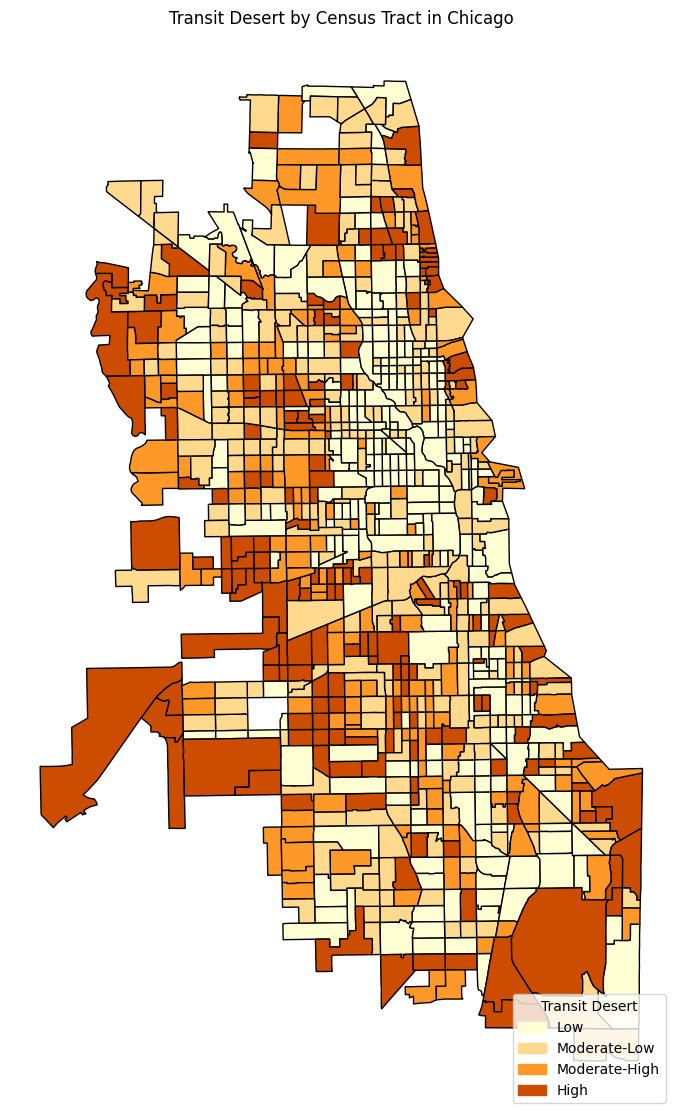

In [190]:
# Transit desert map

# Define a color map for the quartiles
quartile_colors = {
    'Low': "#ffffd4",
    'Moderate-Low': "#fed98e",
    'Moderate-High': "#fe9929",
    'High': "#cc4c02"
}

# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(14, 14))

gdf.plot(ax=ax,
         legend=True,
         legend_kwds={'title': "Transit Desert"},
         color=[quartile_colors[q] for q in gdf['transit_deserts_bins']],
         edgecolor='black')  # Add edgecolor to show tract boundaries

# Add a topographic basemap (OpenStreetMap)
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Add a legend with custom color patches
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in quartile_colors.items()]
ax.legend(handles=legend_handles, title='Transit Desert', loc='lower right')

# Add a title and axes labels
ax.set_title('Transit Desert by Census Tract in Chicago')
ax.set_axis_off()

# save plot
fig.savefig('/Users/elizalawrence/Documents/GEOG490_gds/FinalProject/desertchicago.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

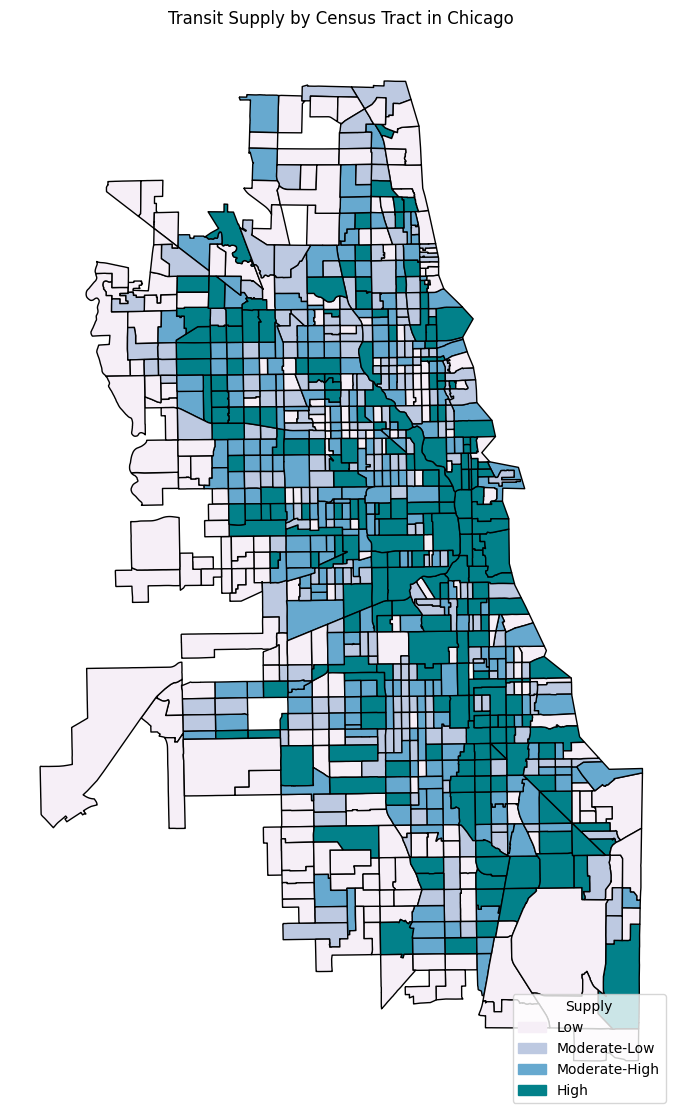

In [192]:
# Transit supply map

# Define a color map for the quartiles
quartile_colors = {
    'Low': "#f6eff7",
    'Moderate-Low': "#bdc9e1",
    'Moderate-High': "#67a9cf",
    'High': "#02818a"
}
# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(14, 14))

gdf.plot(ax=ax,
         legend=True,
         legend_kwds={'title': "Transit Desert"},
         color=[quartile_colors[q] for q in gdf['quartile_x']],
         edgecolor='black')  # Add edgecolor to show tract boundaries

# Add a topographic basemap (OpenStreetMap)
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Add a legend with custom color patches
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in quartile_colors.items()]
ax.legend(handles=legend_handles, title='Supply', loc='lower right')

# Add a title and axes labels
ax.set_title('Transit Supply by Census Tract in Chicago')
ax.set_axis_off()

# save plot
fig.savefig('/Users/elizalawrence/Documents/GEOG490_gds/FinalProject/supplychicago.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

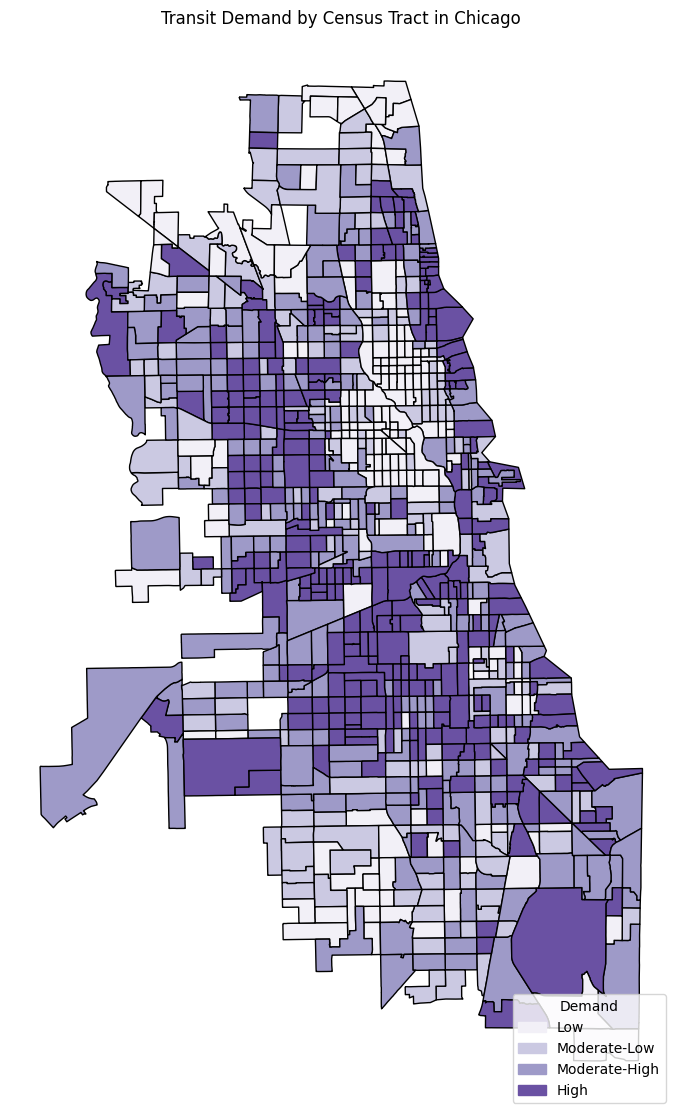

In [193]:
# Transit demand map

# Define a color map for the quartiles
quartile_colors = {
    'Low': "#f2f0f7",
    'Moderate-Low': "#cbc9e2",
    'Moderate-High': "#9e9ac8",
    'High': "#6a51a3"
}
# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(14, 14))

gdf.plot(ax=ax,
         legend=True,
         legend_kwds={'title': "Demand"},
         color=[quartile_colors[q] for q in gdf['quartile_y']],
         edgecolor='black')  # Add edgecolor to show tract boundaries

# Add a topographic basemap (OpenStreetMap)
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Add a legend with custom color patches
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in quartile_colors.items()]
ax.legend(handles=legend_handles, title='Demand', loc='lower right')

# Add a title and axes labels
ax.set_title('Transit Demand by Census Tract in Chicago')
ax.set_axis_off()

# save plot
fig.savefig('/Users/elizalawrence/Documents/GEOG490_gds/FinalProject/demandchicago.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
